In [6]:
f_s = 1e-8
omega = pi * f_s
gamma = 1
m1 = 1e9
m2 = 1e9
20 * gamma**2 * (1e9 / (m1 + m2))**(2/3) * (1 / YR / omega)**(2/3)

12.67187184316126

In [8]:
f_s = 1e-1
omega = pi * f_s
gamma = 1
m1 = 1e3
m2 = 1e1
20 * gamma**2 * (1e9 / (m1 + m2))**(2/3) * (1 / YR / omega)**(2/3)

4.305066390339891

Shows how to create a vacuum and dark dress binary and compute their relative dephasing.

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

from pydd.binary import *

In [30]:
# Intrinsic parameters of astrophysical benchmark
m1 = 1e5 * MSUN
m2 = 1.4 * MSUN
rho_6 = 0.54e16 * MSUN / PC**3
gamma_s = 7 / 3

# Extrinsic parameters
Phi_c = 0.0  # GW phase at coalescence
t_c = 0.0  # reference time at coalescence
dL = 1e8 * PC  # luminosity distance

# Construct dark dress and vacuum system. These functions set up (almost all)
# the intermediate variables.
rho_s = get_rho_s(rho_6, m1, gamma_s)
r_s = get_r_s(m1, rho_s, gamma_s)
r_isco = get_r_isco(m1)

In [31]:
def get_m_enc(r):
    return 4 * jnp.pi * rho_s * r_s**gamma_s / (3 - gamma_s) * r**(3 - gamma_s)


(get_m_enc(r_s) - get_m_enc(r_isco)) / m1

DeviceArray(0.68399028, dtype=float64)

In [32]:
r_s / PC

DeviceArray(550.84912614, dtype=float64)

In [38]:
# Intrinsic parameters of astrophysical benchmark
m1 = 1e8 * MSUN
m2 = 1e-3 * m1
rho_6 = 4.2e18 * MSUN / PC**3
gamma_s = 7 / 3

# Extrinsic parameters
Phi_c = 0.0  # GW phase at coalescence
t_c = 0.0  # reference time at coalescence
dL = 1e8 * PC  # luminosity distance

# Construct dark dress and vacuum system. These functions set up (almost all)
# the intermediate variables.
rho_s = get_rho_s(rho_6, m1, gamma_s)
dd = make_dynamic_dress(m1, m2, rho_s, gamma_s, Phi_c, t_c, dL)
vb = make_vacuum_binary(m1, m2, Phi_c, t_c, dL)

# Get frequency 5 yr before coalescence (first time is slow due to jit)
t_obs_lisa = 5 * YR
f_l = root_scalar(
    lambda f: t_to_c(f, dd) - t_obs_lisa,
    bracket=(1e-7, 1e-4),
    rtol=1e-15,
    xtol=1e-100,
).root

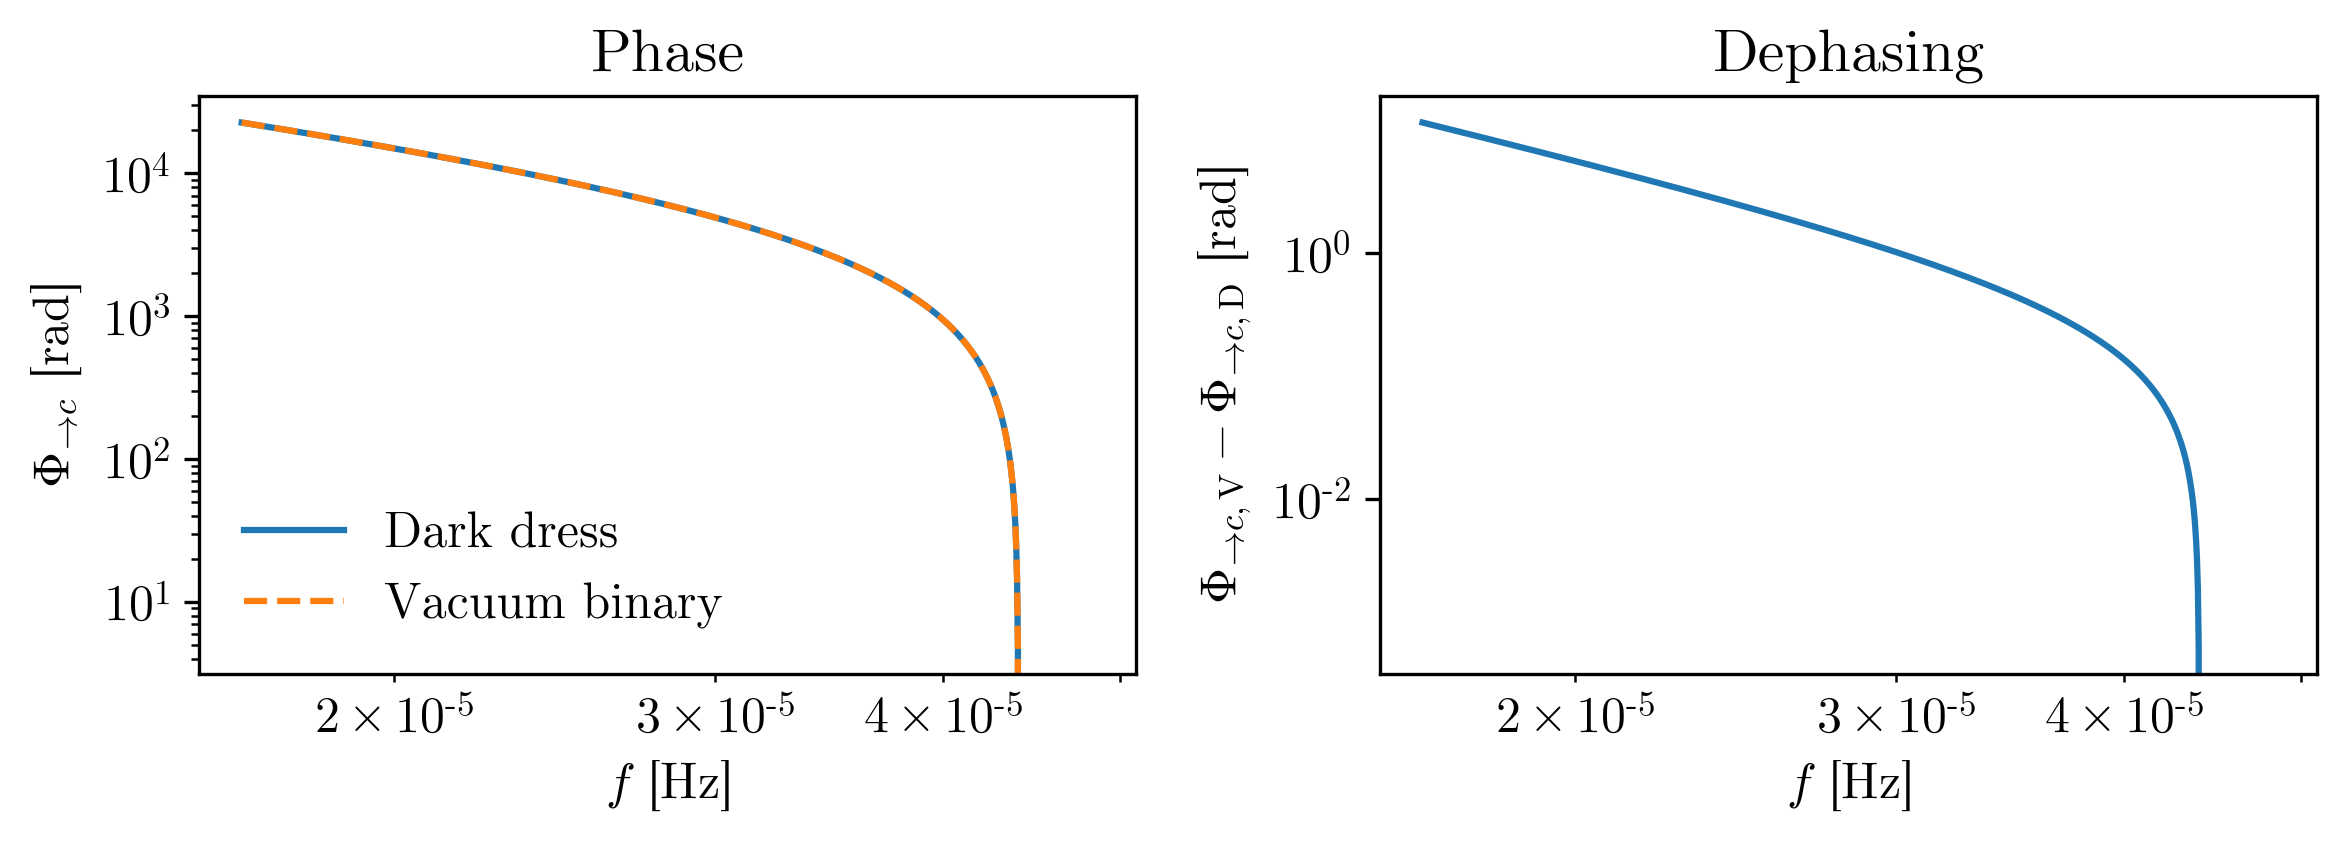

In [39]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
fs = jnp.geomspace(f_l, dd.f_c * 1.1, 1000)
plt.loglog(fs, Phi_to_c(fs, dd), label="Dark dress")
plt.loglog(fs, Phi_to_c(fs, vb), "--", label="Vacuum binary")
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c}$ [rad]")
plt.legend(frameon=False)
plt.title("Phase")

plt.subplot(1, 2, 2)
fs = jnp.geomspace(f_l, dd.f_c * 1.1, 1000)
plt.loglog(fs, Phi_to_c(fs, vb) - Phi_to_c(fs, dd))
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c,\mathrm{V}} - \Phi_{\to c,\mathrm{D}}$ [rad]")
plt.title("Dephasing")

plt.tight_layout()

In [94]:
r = (G * (m1 + m2) / f_l**2)**(1/3)

In [95]:
P_gw = 32 * G**4 * (m1 + m2) * (m1 * m2)**2 / (5 * (C * r)**5)

In [96]:
P_df = 4 * pi * (G * m2)**2 * (rho_6 * (r / (1e-6 * PC))**(-gamma_s)) * get_xi(gamma_s) * jnp.log(jnp.sqrt(m1 / m2)) / jnp.sqrt(G * (m1 + m2) / r)

In [97]:
P_df / P_gw

DeviceArray(0.01216842, dtype=float64)

In [73]:
1 / YR

3.168808781402895e-08

In [103]:
20 * (0.1)**2 * (1e9 * MSUN / (m1 + m2))**(2/3) * (1 / YR / f_l)**(2/3)

0.01433554184248774